In [17]:
from functools import reduce
import operator

import numpy as np

from cospar import reader, F
from everest.window import Canvas, DataChannel
%matplotlib inline

In [18]:
sinuKeys = {1 : '_built_peaskauslu-thoesfthuec', 2 : '_built_oiskeaosle-woatihoo'}

In [41]:
canvas = Canvas(
    size = (12, 12),
    shape = (len(sinuKeys), 1),
    colour = 'white',
    fill = 'black'
    )

for i, freq in enumerate((1, 2)):
    
    conds = (
        F('inputs/aspect') == 1,
        F('inputs/f') == 1,
        F('inputs/tauRef') <= 1e6,
        F('inputs/tauRef') >= 1e5,
        F('inputs/temperatureField') == sinuKeys[freq],
        )
    cut = reader[reduce(operator.__and__, conds)]
    datas = reader[cut : ('inputs/tauRef', 'outputs/chron', 'outputs/Nu')]

    alltau, allt, allNu = [], [], []
    alls = []
    tauVals = np.log10(np.array(sorted(set(tau for tau, *_ in datas.values()))))
    tauDiff = np.diff(tauVals)
    sDict = dict(zip(tauVals, tauDiff))
    sDict[tauVals[-1]] = tauDiff[-1]
    ssum = sum(sDict.values())
    for tauRef, t, Nu in datas.values():
        t = t[:len(Nu)]
        tauRef = np.log10(tauRef)
        alltau.extend(np.full(t.shape, tauRef))
        allt.extend(t)
        allNu.extend(Nu)
        alls.extend(np.full(t.shape, sDict[tauRef] / ssum))
    alltau, allt, allNu = np.array(alltau), np.array(allt), np.array(allNu)
    alls = np.array(alls)

    ax = canvas.make_ax(place = (i, 0))

    ax.scatter(
        DataChannel(allt, lims = (0, 0.45), label = 'Dimensionless time'),
        DataChannel(alltau, lims = (5, 6), label = f'freq = {freq}'),
        c = np.log10(allNu),
        cmap = 'magma',
        s = 1.15 * (alls * ax.inches[1] * 72) ** 2,
        alpha = 1.,
        marker = 2,
        )

    if i == 0:
        ax.props.title.text = 'Nusselt timeseries for varying (log10) yield strength'
    if i != canvas.shape[0] - 1:
#         ax.props.edges.x.ticks.major.labels = []
        ax.props.edges.x.label.visible = False

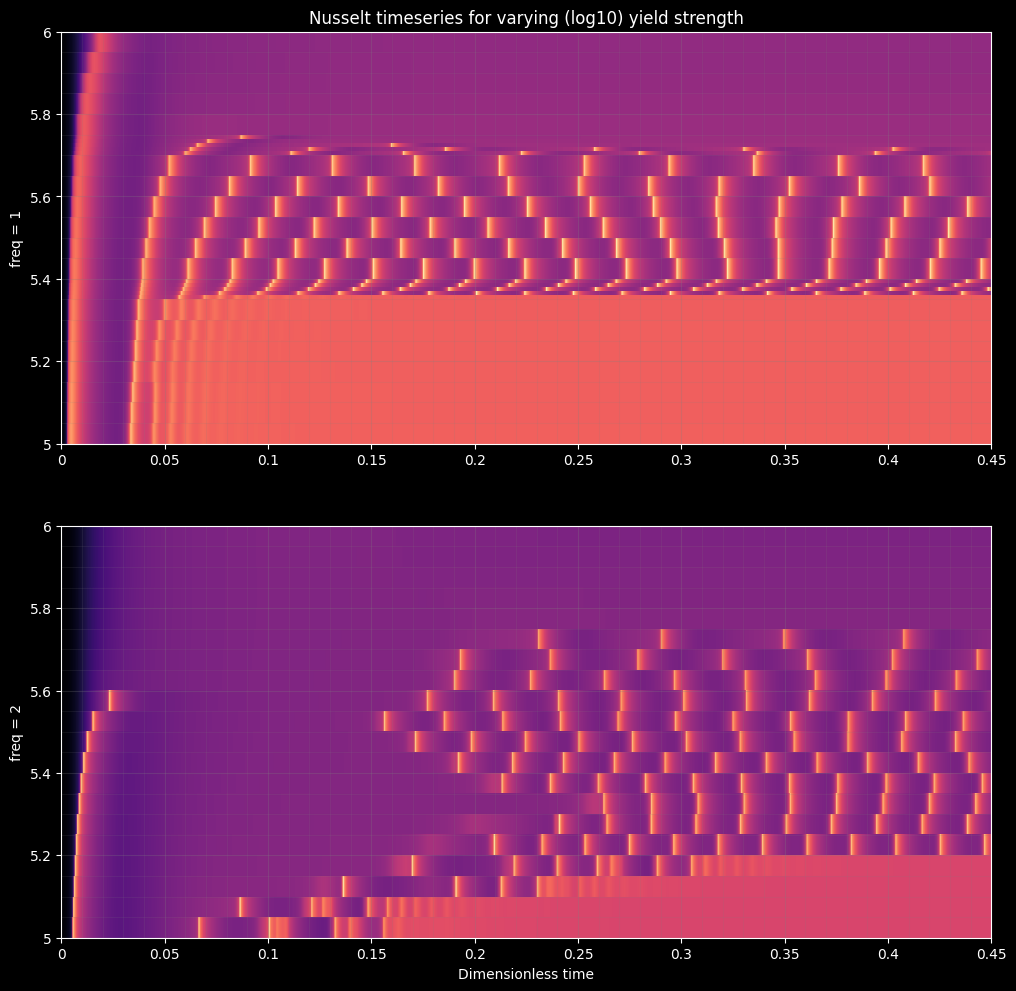

In [42]:
canvas.show()

In [ ]:
# conds = (
#     F('aspect') == 1,
#     F('f') == 1,
#     F('temperatureField') == '_built_oiskeaosle-woatihoo',
#     )
# cut = reader[reduce(operator.__and__, conds)]
# datas = reader[cut : ('tauRef', 't', 'Nu')]